In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
%autosave 0 

Autosave disabled


In [2]:


from utils_hmm import *



the rosdep view is empty: call 'sudo rosdep init' and 'rosdep update'


In [3]:
fast_load=True


if fast_load:
    datamugroso=pd.read_csv('fast_load.csv')
    #datamugroso=pd.read_csv('pddata.csv')
    data= datamugroso.iloc[:,1:].sample(n=10000,axis=0)
    #lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]


####CHOOSE LECS CORRECTLY    
lecs=data.iloc[:,:-5]

In [4]:
lecs.shape

(10000, 722)

In [5]:
data.describe()


,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.041850,2.053857,2.051164,2.046789,2.044322,2.038963,2.033694,2.027991,2.026401,2.020198,...,1.741465,1.745975,1.750342,1.755589,1.248203,1.844519,-1.108193,9.534200,115.499700,117.274600
std,0.984633,0.996637,0.997321,0.996180,0.996577,0.993702,0.989942,0.995757,0.998218,1.005552,...,0.921287,0.922260,0.923742,0.925126,1.053130,1.390736,1.666116,5.782956,79.057914,72.160987
min,0.259560,0.259810,0.260070,0.260339,0.260453,0.251829,0.244371,0.244635,0.244909,0.245191,...,0.309927,0.310498,0.311081,0.311678,-0.341887,-0.135209,-3.141575,0.000000,0.000000,0.000000
25%,1.306816,1.301776,1.297752,1.294421,1.290212,1.291160,1.299023,1.288967,1.294545,1.292656,...,0.956419,0.961789,0.969743,0.977111,0.259905,0.296662,-2.352445,4.000000,48.000000,46.000000
50%,1.972080,1.990177,1.987822,1.974069,1.970151,1.960371,1.935470,1.920718,1.915697,1.918964,...,1.568391,1.569462,1.569878,1.572194,1.263600,2.363174,-1.663432,10.000000,107.000000,119.000000
75%,2.521676,2.530989,2.530544,2.529068,2.526444,2.522138,2.518483,2.515911,2.511479,2.512215,...,2.552876,2.557343,2.561147,2.567385,2.270746,3.224647,-0.034541,15.000000,187.000000,191.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.807467,3.919621,3.135928,19.000000,255.000000,239.000000


In [6]:
lecs=np.clip(lecs,0,5)
data.iloc[:,:-6]=lecs

In [7]:
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.041850,2.053857,2.051164,2.046789,2.044322,2.038963,2.033694,2.027991,2.026401,2.020198,...,1.741465,1.745975,1.750342,1.755589,1.248203,1.844519,-1.108193,9.534200,115.499700,117.274600
std,0.984633,0.996637,0.997321,0.996180,0.996577,0.993702,0.989942,0.995757,0.998218,1.005552,...,0.921287,0.922260,0.923742,0.925126,1.053130,1.390736,1.666116,5.782956,79.057914,72.160987
min,0.259560,0.259810,0.260070,0.260339,0.260453,0.251829,0.244371,0.244635,0.244909,0.245191,...,0.309927,0.310498,0.311081,0.311678,-0.341887,-0.135209,-3.141575,0.000000,0.000000,0.000000
25%,1.306816,1.301776,1.297752,1.294421,1.290212,1.291160,1.299023,1.288967,1.294545,1.292656,...,0.956419,0.961789,0.969743,0.977111,0.259905,0.296662,-2.352445,4.000000,48.000000,46.000000
50%,1.972080,1.990177,1.987822,1.974069,1.970151,1.960371,1.935470,1.920718,1.915697,1.918964,...,1.568391,1.569462,1.569878,1.572194,1.263600,2.363174,-1.663432,10.000000,107.000000,119.000000
75%,2.521676,2.530989,2.530544,2.529068,2.526444,2.522138,2.518483,2.515911,2.511479,2.512215,...,2.552876,2.557343,2.561147,2.567385,2.270746,3.224647,-0.034541,15.000000,187.000000,191.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.807467,3.919621,3.135928,19.000000,255.000000,239.000000


In [8]:
from sklearn.cluster import AffinityPropagation


In [9]:
af = AffinityPropagation(damping=.8).fit(lecs)
#db=DBSCAN().fit(lecs)

In [10]:
data['Vk_aff']=af.labels_
ccvk_aff= af.cluster_centers_

In [11]:
data[['Vk','Vk_aff']]

,Vk,Vk_aff
13405,208,88
10737,46,176
19612,48,39
10394,45,211
12617,220,117
5761,213,16
6999,245,204
12580,220,117
2958,88,179
5205,143,55


Text(0.5,0.98,u'Affinity Prop')

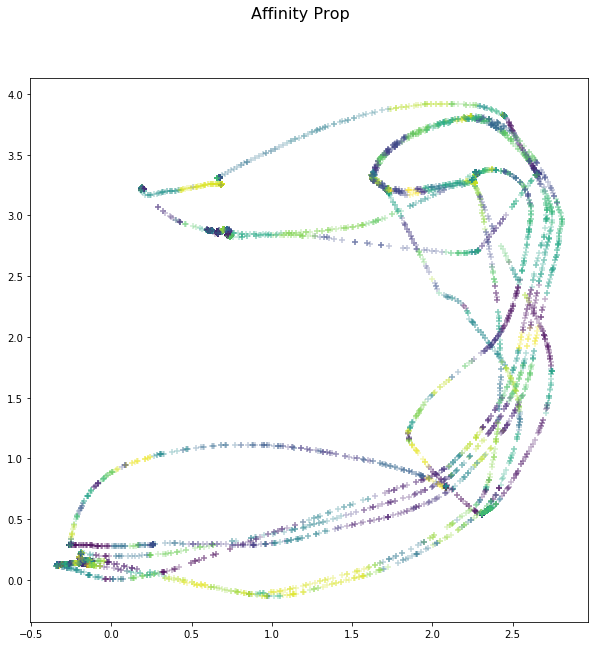

In [12]:
ccvk=np.load('ccvk.npy')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff,alpha=.313)
fig.suptitle('Affinity Prop', fontsize=16)




#cords3=path_to_xy(np.arange(0,len(cc)),cc)
#ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')




In [13]:
data.Vk_aff.value_counts().index[1] 


56

In [18]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_aff_leida= data.Vk_aff.value_counts().index[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

#lec_Kmn_leida= data.Vk.value_counts().index[1]

#lec=data.iloc[index_forlec,:-6].values
lec_Kmn_leida=np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
lec_Kmn_leida,lec_aff_leida



(51, 56)

In [19]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [16]:
#ccvk=cc
cc=ccvk
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

ValueError: operands could not be broadcast together with shapes (721,) (722,) 

In [ ]:
lec_aff_leida= data.Vk_aff.value_counts().index[25]
print (lec_aff_leida)

In [ ]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

lec_Kmn_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()

#lec=data.iloc[index_forlec,:-6].values

#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]

print(lec_aff_leida, lec_Kmn_leida)

In [ ]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
#ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

In [ ]:
from joblib import dump, load
dump(af, 'aff_prop_class.joblib',protocol=2) 

In [ ]:
clf=load('aff_prop_class.joblib') ##PYTHON VERSION 2 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import OPTICS
clust = OPTICS(min_samples=10)

In [ ]:
#####clust.fit(lecs)###NO PREDICT FUNC SO UNFEASIBLE$

In [ ]:
pd.Series(clust.labels_).describe()
data.Vk_aff=clust.labels_

In [ ]:
dump(clust, 'OPTICS_class.joblib',protocol=2) 

In [ ]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_leida= data.Vk_aff.value_counts().index[1]
#lec=data.iloc[index_forlec,:-6].values
lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values
lec_leida

In [ ]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
#ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
lec_leida= data.Vk_aff.value_counts().index[3]

lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values

lec_leida

In [ ]:
ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
#ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'OPTICS')
ax1.legend()

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
dump(af, 'aff_prop_class.joblib',protocol=2) 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import FeatureAgglomeration
agglo = FeatureAgglomeration(n_clusters=15)

In [ ]:
agglo.fit(lecs)

In [ ]:
lecs_reduced=agglo.fit_transform(lecs)

In [ ]:
lecs_reduced.shape

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
pca =PCA(n_components=15)
pca.fit(lecs)

In [ ]:
pca.transform(lecs).shape

In [ ]:
###TO DO GRID SEARCH PCA. FEATURE AGGL

In [ ]:
##LBG----- REading Doc's centroids
f=open('vq_images_sonar_32.dat')
contents=f.readlines()
cc_lgbt=[]
for char in contents:
    words=char.split()
    cc_lgbt.append(words[2:])
cc_buzo=[]
for i in range(32):
    cc_buzo.append(np.asarray(cc_lgbt[i]))
cc_buzo=np.asarray(cc_buzo)


In [ ]:
cc_buzo.shape

In [ ]:
len(cc_buzo)

In [ ]:
import joblib

In [ ]:
import sys


In [ ]:
sys.path.append('/usr/lib/python2.7/')